In [3]:
import numpy as np
from tensorflow.keras import backend as K
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import callbacks
from sklearn.metrics import confusion_matrix
import seaborn as sns
import os
import shutil
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
train_path = 'dataset/train'
test_path = 'dataset/test'
datagen = ImageDataGenerator(
        rescale=1./255,
        validation_split=0.25)
test_batches = datagen.flow_from_directory(test_path, target_size = (100, 100), class_mode='binary', batch_size = 32, shuffle=False)

Found 6000 images belonging to 2 classes.


In [4]:
vgg_model = load_model('vgg_augment.h5')

2022-10-28 16:33:19.292637: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-10-28 16:33:19.294125: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2022-10-28 16:33:19.329808: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-28 16:33:19.330034: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce GTX 1060 6GB computeCapability: 6.1
coreClock: 1.759GHz coreCount: 10 deviceMemorySize: 5.93GiB deviceMemoryBandwidth: 178.99GiB/s
2022-10-28 16:33:19.330048: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2022-10-28 16:33:19.331350: I tensorflow/stream_executor/platfor

In [5]:
y_pred = vgg_model.predict_generator(test_batches, len(test_batches))

2022-10-28 16:33:43.546000: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-10-28 16:33:43.563107: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 3491950000 Hz
2022-10-28 16:33:43.804191: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10
2022-10-28 16:33:43.888577: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudnn.so.7
2022-10-28 16:33:44.331092: W tensorflow/stream_executor/gpu/asm_compiler.cc:63] Running ptxas --version returned 256
2022-10-28 16:33:44.355279: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] Internal: ptxas exited with non-zero error code 256, output: 
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


In [6]:
y_pred_hat = []
for y in y_pred:
    if y>= 0.5:
        y_pred_hat.append(1.0)
    else:
        y_pred_hat.append(0.0)

In [7]:
labels = test_batches.class_indices.keys()

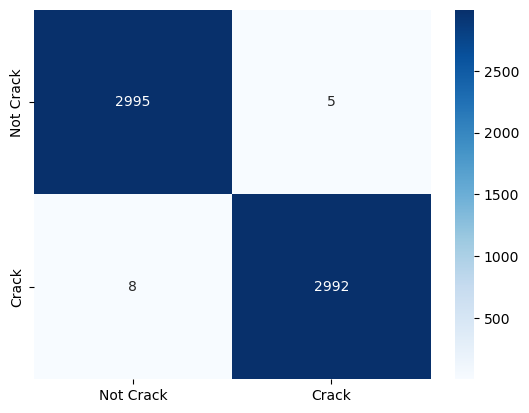

In [13]:
sns.heatmap(confusion_matrix(test_batches.labels, y_pred_hat), annot=True, fmt='g', cmap='Blues', xticklabels = ['Not Crack', 'Crack'], yticklabels = ['Not Crack', 'Crack'])
plt.savefig('confusion_matrix.png')

In [14]:
test_batches.class_indices

{'Negative': 0, 'Positive': 1}